In [112]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, Conv2D, MaxPooling2D, Flatten, Activation,UpSampling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.nn import relu, softmax
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, imsize * imsize)
    x_test = x_test.reshape(-1, imsize * imsize)
    return x_train, y_train, x_test, y_test
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((min(min(val_loss),min(loss)), 1.5*max(val_loss + loss)))
    ax[1].set_ylim((min(min(val_acc),min(acc)), 1))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()

In [50]:
num_classes = 6
img_rows = img_cols = 64
file_image_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_image_test = 'data_test.bin'
file_lable_test = 'label_test.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

In [51]:
def one_part(units, x):
    x = Dense(units)(x)
    x = LeakyReLU()(x)
    return Dropout(0.25)(x)

In [63]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape = (64*64))
x = one_part(2048, inp)
x = one_part(1024, x)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = one_part(1024, x)
x = one_part(2048, x)
decoded = Dense(64*64, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dense_98 (Dense)            (None, 2048)              8390656   
                                                                 
 leaky_re_lu_74 (LeakyReLU)  (None, 2048)              0         
                                                                 
 dropout_74 (Dropout)        (None, 2048)              0         
                                                                 
 dense_99 (Dense)            (None, 1024)              2098176   
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout_75 (Dropout)        (None, 1024)              0   

In [24]:
def some_plts(imgs):
    fig, axs = plt.subplots(4, 4)
    k = -1
    for i in range(4):
        for j in range(4):
            k += 1
            img = imgs[k].reshape(64, 64)
            axs[i, j].imshow(img, cmap = 'gray')
            axs[i, j].axis('off')
    plt.subplots_adjust(wspace = 1, hspace = 0)
    plt.show()

epoch: 1
113/113 [==============================] - 13s 119ms/step - loss: 0.0304
epoch: 2
113/113 [==============================] - 17s 154ms/step - loss: 0.0304
epoch: 3
113/113 [==============================] - 28s 248ms/step - loss: 0.0301


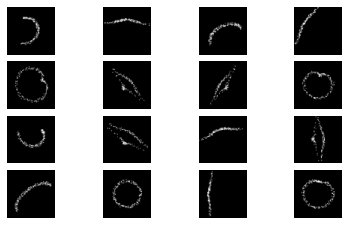

1/1 [==============================] - 0s 315ms/step


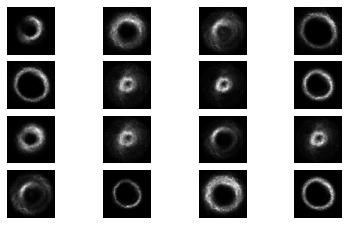

epoch: 4
113/113 [==============================] - 29s 254ms/step - loss: 0.0299
epoch: 5
113/113 [==============================] - 28s 245ms/step - loss: 0.0297


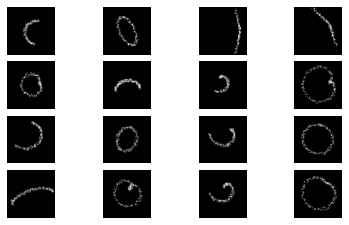

1/1 [==============================] - 0s 220ms/step


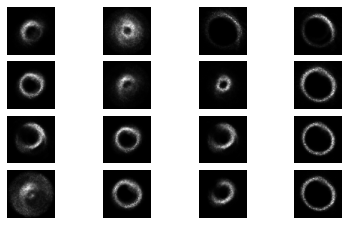

epoch: 6
113/113 [==============================] - 24s 217ms/step - loss: 0.0296
epoch: 7
113/113 [==============================] - 27s 241ms/step - loss: 0.0293


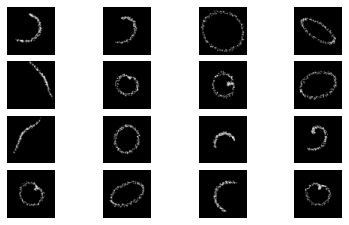

1/1 [==============================] - 0s 86ms/step


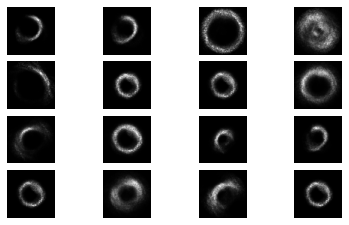

epoch: 8
113/113 [==============================] - 35s 307ms/step - loss: 0.0291
epoch: 9
113/113 [==============================] - 30s 264ms/step - loss: 0.0290


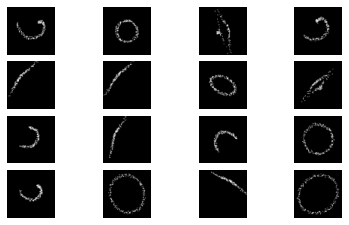

1/1 [==============================] - 0s 121ms/step


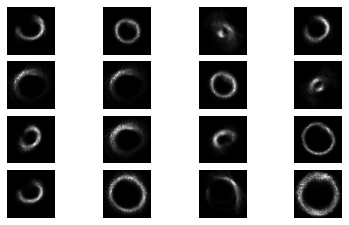

epoch: 10
113/113 [==============================] - 34s 296ms/step - loss: 0.0288


In [25]:
len_test = len(y_test)
plt_epoch = True
epochs = 10 # Число эпох
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    model.fit(x = x_train, y = x_train)
    # Выводим, если работаем в IPython, Jupyter или Colab
    if plt_epoch and epoch > 0 and epoch % 2 == 0:
        arr_idx = np.random.randint(0, len_test, 16) # class 'numpy.ndarray'
        imgs_for_test = x_test[arr_idx].reshape(16, 64*64) # class 'numpy.ndarray'
        some_plts(imgs_for_test)
        imgs_pedicted = model.predict(imgs_for_test)
        some_plts(imgs_pedicted) # imgs_pedicted.shape = (16, 784)

# Data generation in color

In [142]:
import PIL

In [117]:
colors = {
    'white':(255, 255, 255),
    'red':(255, 0, 0),
    'green':(0, 255, 0),
    'yellow':(255, 255, 0),
    'phiolet':(255, 0, 255),
    'blue':(0, 255, 255),
}

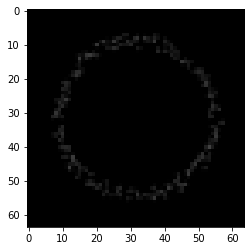

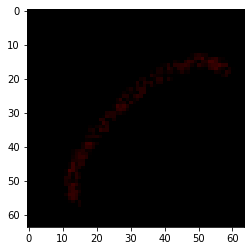

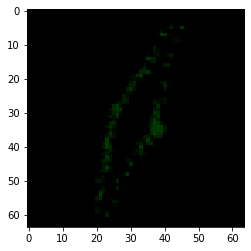

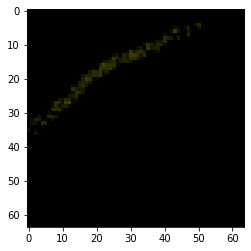

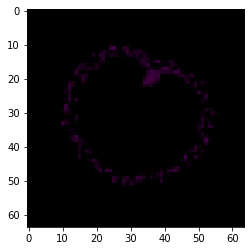

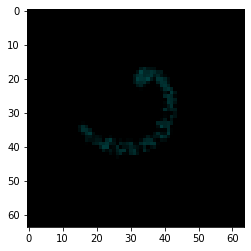

In [183]:
for i, values in enumerate(colors.items()):
    indx = np.flatnonzero(y_train == i)
    new_matrix = np.zeros((64, 64, 3))
    matrix = x_train[indx][0]
    #print(new_matrix[:,:,0])
    for ind, j in enumerate(values[1]):
        if j>0:
            new_matrix[:,:,ind] = matrix.reshape((64,64))*255
    image = PIL.Image.fromarray(new_matrix.astype('uint8'), 'RGB')
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)

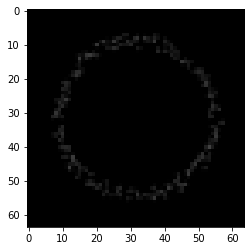

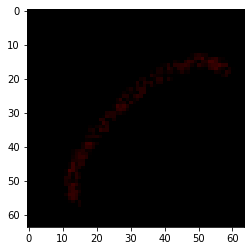

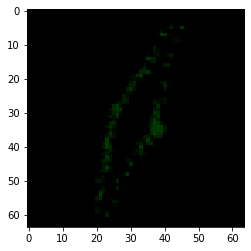

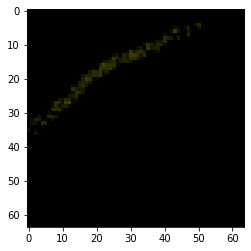

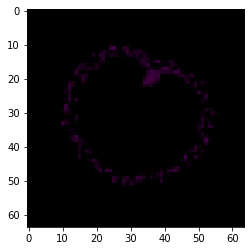

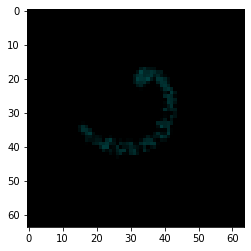

In [206]:
for i, values in enumerate(colors.items()):
    indx = np.flatnonzero(y_train == i)
    new_matrix = np.zeros((len(indx), 64, 64, 3))
    matrix = x_train[indx].reshape((len(indx),64,64))
    for ind, j in enumerate(values[1]):
        if j>0:
            new_matrix[:,:,:,ind] = matrix
    image = PIL.Image.fromarray((new_matrix[0]*255).astype('uint8'), 'RGB')
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)

In [207]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape=(64*64, 3))
x = one_part(2048, inp)
x = one_part(1024, x)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = one_part(1024, x)
x = one_part(2048, x)
decoded = Dense(64*64, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

(600, 64, 64, 3)

1/1 [==============================] - 0s 21ms/step


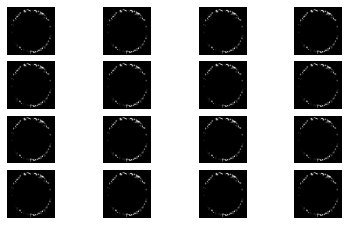

In [32]:
img = np.random.uniform(0, 1, 16 * 64*64).reshape(16, 64*64)
imgs_pedicted = model.predict(img)
some_plts(imgs_pedicted)

In [81]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64, 64, 64),
                 padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_91 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 65536)             0         
                                                                 
 dense_150 (Dense)           (None, 128)               8388736   
                                                     

In [73]:
model = tensorflow.keras.Sequential([
                          Dense(100, activation = 'relu'),
                          Dense(50, activation= 'relu'),
                          Dense(50, activation= 'relu'),
                          Dense(1, activation = 'softmax')
])
model.build(input_shape=(200,200,200))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (200, 200, 100)           20100     
                                                                 
 dense_137 (Dense)           (200, 200, 50)            5050      
                                                                 
 dense_138 (Dense)           (200, 200, 50)            2550      
                                                                 
 dense_139 (Dense)           (200, 200, 1)             51        
                                                                 
Total params: 27,751
Trainable params: 27,751
Non-trainable params: 0
_________________________________________________________________


In [66]:
model = Sequential() # CNN构建
model.add(Conv2D(
input_shape=(200, 200, 4),
# input_shape=(1, Width, Height),
filters=16,
kernel_size=3,
strides=1,
padding='same',
data_format='channels_last',
name='CONV_1'
))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CONV_1 (Conv2D)             (None, 200, 200, 16)      592       
                                                                 
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [102]:
def one_part(units, x):
    x = Dense(units)(x)
    x = LeakyReLU()(x)
    return Dropout(0.25)(x)

In [103]:
np.zeros((64*64, 3)).shape

(4096, 3)

In [116]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape=(64*64, 3))
x = one_part(2048, inp)
x = one_part(1024, x)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = one_part(1024, x)
x = one_part(2048, x)
decoded = Dense(64*64, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 4096, 3)]         0         
                                                                 
 dense_260 (Dense)           (None, 4096, 2048)        8192      
                                                                 
 leaky_re_lu_178 (LeakyReLU)  (None, 4096, 2048)       0         
                                                                 
 dropout_176 (Dropout)       (None, 4096, 2048)        0         
                                                                 
 dense_261 (Dense)           (None, 4096, 1024)        2098176   
                                                                 
 leaky_re_lu_179 (LeakyReLU)  (None, 4096, 1024)       0         
                                                                 
 dropout_177 (Dropout)       (None, 4096, 1024)        0  

In [98]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#-------------------------
#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#4rd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#-------------------------

model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

model.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 activation_3 (Activation)   (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 112, 112, 2)       290       
                                                                 
 activation_4 (Activation)   (None, 112, 112, 2)       0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 2)        0         
 g2D)                                                

In [115]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])
model.add()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 12288)             0         
                                                                 
 dense_258 (Dense)           (None, 128)               1572992   
                                                                 
 dense_259 (Dense)           (None, 10)                1290      
                                                                 
Total params: 1,574,282
Trainable params: 1,574,282
Non-trainable params: 0
_________________________________________________________________
